<script async src="https://www.googletagmanager.com/gtag/js?id=UA-59152712-8"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-59152712-8');
</script>

# Start-to-Finish Example: Setting up Exact Initial Data for Einstein's Equations, in Curvilinear Coordinates
## Authors: Brandon Clark, George Vopal, and Zach Etienne

## This module sets up initial data for a specified exact solution written in terms of ADM variables, using the [*Exact* ADM Spherical to BSSN Curvilinear initial data module](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py).

**Notebook Status:** <font color='green'><b> Validated </b></font>

**Validation Notes:** This module has been validated, confirming that all initial data sets exhibit convergence to zero of the Hamiltonian and momentum constraints at the expected rate or better.

### NRPy+ Source Code for this module:
* [BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Converting_Exact_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb): *Exact* Spherical ADM$\to$Curvilinear BSSN converter function
* [BSSN/BSSN_constraints.py](../edit/BSSN/BSSN_constraints.py); [\[**tutorial**\]](Tutorial-BSSN_constraints.ipynb): Hamiltonian & momentum constraints in BSSN curvilinear basis/coordinates

## Introduction:
Here we use NRPy+ to generate a C code confirming that specified *exact* initial data satisfy Einstein's equations of general relativity. The following exact initial data types are supported:

* Shifted Kerr-Schild spinning black hole initial data
* "Static" Trumpet black hole initial data
* Brill-Lindquist two black hole initial data
* UIUC black hole initial data

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This notebook is organized as follows

0. [Preliminaries](#prelim): The Choices for Initial Data
    1. [Choice 1](#sks): Shifted Kerr-Schild spinning black hole initial data
    1. [Choice 2](#st):  "Static" Trumpet black hole initial data
    1. [Choice 3](#bl): Brill-Lindquist two black hole initial data
    1. [Choice 4](#uiuc): UIUC black hole initial data
1. [Step 2](#initializenrpy): Set core NRPy+ parameters for numerical grids and reference metric
1. [Step 3](#adm_id): Import Black Hole ADM initial data C function from NRPy+ module
1. [Step 4](#validate): Validating that the black hole initial data satisfy the Hamiltonian constraint
    1. [Step 4.a](#ham_const_output): Output C code for evaluating the Hamiltonian and Momentum constraint violation
    1. [Step 4.b](#apply_bcs): Apply singular, curvilinear coordinate boundary conditions
    1. [Step 4.c](#enforce3metric): Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint
1. [Step 5](#mainc): `Initial_Data.c`: The Main C Code
1. [Step 6](#plot): Plotting the initial data
1. [Step 7](#convergence): Validation: Convergence of numerical errors (Hamiltonian constraint violation) to zero
1. [Step 8](#latex_pdf_output): Output this notebook to $\LaTeX$-formatted PDF file

<a id='prelim'></a>

# Preliminaries: The Choices for Initial Data
$$\label{prelim}$$

<a id='sks'></a>

## Shifted Kerr-Schild spinning black hole initial data \[Back to [top](#toc)\]
$$\label{sks}$$

Here we use NRPy+ to generate initial data for a spinning black hole.

Shifted Kerr-Schild spinning black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of both the Hamiltonian and momentum constraint violations at the expected order to the exact solution.

**NRPy+ Source Code:**
* [BSSN/ShiftedKerrSchild.py](../edit/BSSN/ShiftedKerrSchild.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb)

The [BSSN.ShiftedKerrSchild](../edit/BSSN/ShiftedKerrSchild.py) NRPy+ module does the following:

1. Set up shifted Kerr-Schild initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='st'></a>

## "Static" Trumpet black hole initial data \[Back to [top](#toc)\]
$$\label{st}$$

Here we use NRPy+ to generate initial data for a single trumpet black hole ([Dennison & Baumgarte, PRD ???](https://arxiv.org/abs/??)).

"Static" Trumpet black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution. It was carefully ported from the [original NRPy+ code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/StaticTrumpet.py](../edit/BSSN/StaticTrumpet.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-StaticTrumpet.ipynb)

The [BSSN.StaticTrumpet](../edit/BSSN/StaticTrumpet.py) NRPy+ module does the following:

1. Set up static trumpet black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-StaticTrumpetBlackHole.ipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='bl'></a>

## Brill-Lindquist initial data \[Back to [top](#toc)\]
$$\label{bl}$$

Here we use NRPy+ to generate initial data for two black holes (Brill-Lindquist, [Brill & Lindquist, Phys. Rev. 131, 471, 1963](https://journals.aps.org/pr/abstract/10.1103/PhysRev.131.471); see also Eq. 1 of [Brandt & Brügmann, arXiv:gr-qc/9711015v1](https://arxiv.org/pdf/gr-qc/9711015v1.pdf)).

[//]: # " and then we use it to generate the RHS expressions for [Method of Lines](https://reference.wolfram.com/language/tutorial/NDSolveMethodOfLines.html) time integration based on the [explicit Runge-Kutta fourth-order scheme](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4)."

Brill-Lindquist initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/BrillLindquist.py](../edit/BSSN/BrillLindquist.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb)
* [BSSN/BSSN_ID_function_string.py](../edit/BSSN/BSSN_ID_function_string.py)

The [BSSN.BrillLindquist](../edit/BSSN/BrillLindquist.py) NRPy+ module does the following:

1. Set up Brill-Lindquist initial data [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Cartesian basis**, as [documented here](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb). 
1. Convert the ADM **Cartesian quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_ADMCartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='uiuc'></a>

## UIUC black hole initial data \[Back to [top](#toc)\]
$$\label{uiuc}$$ 

UIUC black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/UIUCBlackHole.py](../edit/BSSN/UIUCBlackHole.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-UIUCBlackHole.ipynb)

The [BSSN.UIUCBlackHole](../edit/BSSN/UIUCBlackHole.py) NRPy+ module does the following:

1. Set up UIUC black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-UIUCBlackHole.ipynb). 
1. Convert the numerical ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='-pickid'></a>

# Step 1: Specify the Initial Data to Test  \[Back to [top](#toc)\]
$$\label{pickid}$$

Here you have a choice for which initial data you would like to import and test for convergence. The following is a list of the currently compatible `initial_data_string` options for you to choose from.

* `"Shifted KerrSchild"`
* `"Static Trumpet"`
* `"Brill-Lindquist"`
* `"UIUC"`

In [1]:
import collections

#################
# For the User: Choose initial data, default is Shifted KerrSchild.
#               You are also encouraged to adjust any of the
#               DestGridCoordSystem, freeparams, or EnableMomentum parameters!
#               NOTE: Only DestGridCoordSystem == Spherical or SinhSpherical
#                     currently work out of the box; additional modifications
#                     will likely be necessary for other CoordSystems.
#################
initial_data_string = "Shifted KerrSchild" # "UIUC"


dictID = {}
IDmod_retfunc = collections.namedtuple('IDmod_retfunc', 'modulename functionname DestGridCoordSystem freeparams EnableMomentum')

dictID['Shifted KerrSchild']  = IDmod_retfunc(
    modulename = "BSSN.ShiftedKerrSchild", functionname = "ShiftedKerrSchild",
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL M   = 1.0;", "const REAL a   = 0.9;", "const REAL r0 = 1.0;"],
    EnableMomentum = True)

dictID['Static Trumpet'] = IDmod_retfunc(
    modulename = "BSSN.StaticTrumpet", functionname = "StaticTrumpet",
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL M   = 1.0;"],
    EnableMomentum = False)

dictID['Brill-Lindquist'] = IDmod_retfunc(
    modulename = "BSSN.BrillLindquist", functionname = "BrillLindquist",
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL BH1_posn_x =-1.0,BH1_posn_y = 0.0,BH1_posn_z = 0.0;",
                  "const REAL BH2_posn_x = 1.0,BH2_posn_y = 0.0,BH2_posn_z = 0.0;", "const REAL BH1_mass = 0.5,BH2_mass = 0.5;"],
    EnableMomentum = False)

dictID['UIUC'] = IDmod_retfunc(modulename = "BSSN.UIUCBlackHole", functionname = "UIUCBlackHole",
    DestGridCoordSystem = "SinhSpherical",
    freeparams = ["const REAL M   = 1.0;", "const REAL chi = 0.99;"],
    EnableMomentum = True)

<a id='initializenrpy'></a>

# Step 2: Set up the needed NRPy+ infrastructure and declare core gridfunctions \[Back to [top](#toc)\]
$$\label{initializenrpy}$$

We will import the core modules of NRPy that we will need and specify the main gridfunctions we will need.

In [2]:
# Step P1: Import needed NRPy+ core modules:
from outputC import lhrh,outC_function_dict,outCfunction # NRPy+: Core C code output module
import finite_difference as fin  # NRPy+: Finite difference C code generation module
import NRPy_param_funcs as par   # NRPy+: Parameter interface
import grid as gri               # NRPy+: Functions having to do with numerical grids
import indexedexp as ixp         # NRPy+: Symbolic indexed expression (e.g., tensors, vectors, etc.) support
import reference_metric as rfm   # NRPy+: Reference metric support
import cmdline_helper as cmd     # NRPy+: Multi-platform Python command-line interface
import shutil, os, sys, time     # Standard Python modules for multiplatform OS-level functions, benchmarking
import importlib                 # Standard Python module for interactive module imports

# Step P2: Create C code output directory:
Ccodesdir = os.path.join("BlackHoleID_Ccodes/")
# First remove C code output directory if it exists
# Courtesy https://stackoverflow.com/questions/303200/how-do-i-remove-delete-a-folder-that-is-not-empty
# !rm -r ScalarWaveCurvilinear_Playground_Ccodes
shutil.rmtree(Ccodesdir, ignore_errors=True)
# Then create a fresh directory
cmd.mkdir(Ccodesdir)

# Step P3: Create executable output directory:
outdir = os.path.join(Ccodesdir,"output/")
cmd.mkdir(outdir)

# Step 1: Set the spatial dimension parameter
#         to three this time, and then read
#         the parameter as DIM.
par.set_parval_from_str("grid::DIM",3)
DIM = par.parval_from_str("grid::DIM")

# Step 2: Set some core parameters, including CoordSystem MoL timestepping algorithm,
#                                 FD order, floating point precision, and CFL factor:
# Choices are: Spherical, SinhSpherical, SinhSphericalv2, Cylindrical, SinhCylindrical,
#              SymTP, SinhSymTP
CoordSystem     = "Spherical"

# Step 2.a: Set defaults for Coordinate system parameters.
#           These are perhaps the most commonly adjusted parameters,
#           so we enable modifications at this high level.

# domain_size sets the default value for:
#   * Spherical's params.RMAX
#   * SinhSpherical*'s params.AMAX
#   * Cartesians*'s -params.{x,y,z}min & .{x,y,z}max
#   * Cylindrical's -params.ZMIN & .{Z,RHO}MAX
#   * SinhCylindrical's params.AMPL{RHO,Z}
#   * *SymTP's params.AMAX
domain_size     = 3.0

# sinh_width sets the default value for:
#   * SinhSpherical's params.SINHW
#   * SinhCylindrical's params.SINHW{RHO,Z}
#   * SinhSymTP's params.SINHWAA
sinh_width      = 0.4 # If Sinh* coordinates chosen

# sinhv2_const_dr sets the default value for:
#   * SinhSphericalv2's params.const_dr
#   * SinhCylindricalv2's params.const_d{rho,z}
sinhv2_const_dr = 0.05# If Sinh*v2 coordinates chosen

# SymTP_bScale sets the default value for:
#   * SinhSymTP's params.bScale
SymTP_bScale    = 0.5 # If SymTP chosen

FD_order  = 4        # Finite difference order: even numbers only, starting with 2. 12 is generally unstable
REAL      = "double" # Best to use double here.

# Step 3: Set the coordinate system for the numerical grid
par.set_parval_from_str("reference_metric::CoordSystem",CoordSystem)
rfm.reference_metric() # Create ReU, ReDD needed for rescaling B-L initial data, generating BSSN RHSs, etc.

# Step 4: Set the finite differencing order to FD_order (set above).
par.set_parval_from_str("finite_difference::FD_CENTDERIVS_ORDER", FD_order)

# Step 5: Set the direction=2 (phi) axis to be the symmetry axis; i.e.,
#         axis "2", corresponding to the i2 direction.
#         This sets all spatial derivatives in the phi direction to zero.
par.set_parval_from_str("indexedexp::symmetry_axes","2")

# Step 6: The MoLtimestepping interface is only used for memory allocation/deallocation
import MoLtimestepping.C_Code_Generation as MoL
from MoLtimestepping.RK_Butcher_Table_Dictionary import Butcher_dict
RK_method = "Euler" # DOES NOT MATTER; Again MoL interface is only used for memory alloc/dealloc.
RK_order  = Butcher_dict[RK_method][1]
cmd.mkdir(os.path.join(Ccodesdir,"MoLtimestepping/"))
MoL.MoL_C_Code_Generation(RK_method, RHS_string      = "", post_RHS_string = "",
    outdir = os.path.join(Ccodesdir,"MoLtimestepping/"))

<a id='adm_id'></a>

# Step 3: Import Black Hole ADM initial data C function from NRPy+ module \[Back to [top](#toc)\]
$$\label{adm_id}$$

In [3]:
# Import Black Hole initial data

IDmodule = importlib.import_module(dictID[initial_data_string].modulename)
IDfunc = getattr(IDmodule, dictID[initial_data_string].functionname)
IDfunc() # Registers ID C function in dictionary, used below to output to file.
with open(os.path.join(Ccodesdir,"initial_data.h"),"w") as file:
    file.write(outC_function_dict["initial_data"])

<a id='cparams_rfm_and_domainsize'></a>

## Step 3.a: Output C codes needed for declaring and setting Cparameters; also set `free_parameters.h` \[Back to [top](#toc)\]
$$\label{cparams_rfm_and_domainsize}$$

Based on declared NRPy+ Cparameters, first we generate `declare_Cparameters_struct.h`, `set_Cparameters_default.h`, and `set_Cparameters[-SIMD].h`.

Then we output `free_parameters.h`, which sets initial data parameters, as well as grid domain & reference metric parameters, applying `domain_size` and `sinh_width`/`SymTP_bScale` (if applicable) as set above

In [4]:
# Step 3.a.i: Set free_parameters.h
# Output to $Ccodesdir/free_parameters.h reference metric parameters based on generic
#    domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale,
#    parameters set above.
rfm.out_default_free_parameters_for_rfm(os.path.join(Ccodesdir,"free_parameters.h"),
                                        domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale)

# Step 3.a.ii: Generate set_Nxx_dxx_invdx_params__and__xx.h:
rfm.set_Nxx_dxx_invdx_params__and__xx_h(Ccodesdir)

# Step 3.a.iii: Generate xx_to_Cart.h, which contains xx_to_Cart() for
#               (the mapping from xx->Cartesian) for the chosen
#               CoordSystem:
rfm.xx_to_Cart_h("xx_to_Cart","./set_Cparameters.h",os.path.join(Ccodesdir,"xx_to_Cart.h"))

# Step 3.a.iv: Generate declare_Cparameters_struct.h, set_Cparameters_default.h, and set_Cparameters[-SIMD].h
par.generate_Cparameters_Ccodes(os.path.join(Ccodesdir))

<a id='validate'></a>

# Step 4: Validating that the black hole initial data satisfy the Hamiltonian constraint \[Back to [top](#toc)\]
$$\label{validate}$$

We will validate that the black hole initial data satisfy the Hamiltonian constraint, modulo numerical finite differencing error.

<a id='ham_const_output'></a>

## Step 4.a:  Output C code for evaluating the Hamiltonian and Momentum constraint violation \[Back to [top](#toc)\]
$$\label{ham_const_output}$$

First output C code for evaluating the Hamiltonian constraint violation. For the initial data where `EnableMomentum = True` we must also output C code for evaluating the Momentum constraint violation.

In [5]:
import BSSN.BSSN_constraints as bssncon
# Now register the Hamiltonian & momentum constraints as gridfunctions.
H = gri.register_gridfunctions("AUX","H")
MU = ixp.register_gridfunctions_for_single_rank1("AUX", "MU")

# Generate symbolic expressions for Hamiltonian & momentum constraints
import BSSN.BSSN_constraints as bssncon
bssncon.BSSN_constraints(add_T4UUmunu_source_terms=False)

# Generate optimized C code for Hamiltonian constraint
desc="Evaluate the Hamiltonian constraint"
name="Hamiltonian_constraint"
outCfunction(
    outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
    params   = """const paramstruct *restrict params, REAL *restrict xx[3],
                  REAL *restrict in_gfs, REAL *restrict aux_gfs""",
    body     = fin.FD_outputC("returnstring",lhrh(lhs=gri.gfaccess("aux_gfs", "H"), rhs=bssncon.H),
                              params="outCverbose=False"),
    loopopts = "InteriorPoints,Read_xxs")

# Generate optimized C code for momentum constraint
desc="Evaluate the momentum constraint"
name="momentum_constraint"
outCfunction(
    outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
    params   = """const paramstruct *restrict params, REAL *restrict xx[3],
                  REAL *restrict in_gfs, REAL *restrict aux_gfs""",
    body     = fin.FD_outputC("returnstring",
                              [lhrh(lhs=gri.gfaccess("aux_gfs", "MU0"), rhs=bssncon.MU[0]),
                               lhrh(lhs=gri.gfaccess("aux_gfs", "MU1"), rhs=bssncon.MU[1]),
                               lhrh(lhs=gri.gfaccess("aux_gfs", "MU2"), rhs=bssncon.MU[2])],
                              params="outCverbose=False"),
    loopopts = "InteriorPoints,Read_xxs")

Output C function Hamiltonian_constraint() to file BlackHoleID_Ccodes/Hamiltonian_constraint.h
Output C function momentum_constraint() to file BlackHoleID_Ccodes/momentum_constraint.h


<a id='enforce3metric'></a>

## Step 4.b: Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint \[Back to [top](#toc)\]
$$\label{enforce3metric}$$

Then enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint (Eq. 53 of [Ruchlin, Etienne, and Baumgarte (2018)](https://arxiv.org/abs/1712.07658)), as [documented in the corresponding NRPy+ tutorial notebook](Tutorial-BSSN_enforcing_determinant_gammabar_equals_gammahat_constraint.ipynb)

Applying curvilinear boundary conditions should affect the initial data at the outer boundary, and will in general cause the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint to be violated there. Thus after we apply these boundary conditions, we must always call the routine for enforcing the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint:

In [6]:
# Set up the C function for the det(gammahat) = det(gammabar)
import BSSN.Enforce_Detgammahat_Constraint as EGC
enforce_detg_constraint_symb_expressions = EGC.Enforce_Detgammahat_Constraint_symb_expressions()

EGC.output_Enforce_Detgammahat_Constraint_Ccode(Ccodesdir,exprs=enforce_detg_constraint_symb_expressions,
                                                Read_xxs=True)

Output C function enforce_detgammahat_constraint() to file BlackHoleID_Ccodes/enforce_detgammahat_constraint.h


<a id='bc_functs'></a>

## Step 4.c: Set up boundary condition functions for chosen singular, curvilinear coordinate system \[Back to [top](#toc)\]
$$\label{bc_functs}$$

Next apply singular, curvilinear coordinate boundary conditions [as documented in the corresponding NRPy+ tutorial notebook](Tutorial-Start_to_Finish-Curvilinear_BCs.ipynb)

In [7]:
import CurviBoundaryConditions.CurviBoundaryConditions as cbcs
cbcs.Set_up_CurviBoundaryConditions(os.path.join(Ccodesdir,"boundary_conditions/"),Cparamspath=os.path.join("../"))

Wrote to file "BlackHoleID_Ccodes/boundary_conditions/parity_conditions_symbolic_dot_products.h"
Evolved parity: ( aDD00:4, aDD01:5, aDD02:6, aDD11:7, aDD12:8, aDD22:9,
    alpha:0, betU0:1, betU1:2, betU2:3, cf:0, hDD00:4, hDD01:5, hDD02:6,
    hDD11:7, hDD12:8, hDD22:9, lambdaU0:1, lambdaU1:2, lambdaU2:3, trK:0,
    vetU0:1, vetU1:2, vetU2:3 )
Auxiliary parity: ( H:0, MU0:1, MU1:2, MU2:3 )

Wrote to file "BlackHoleID_Ccodes/boundary_conditions/EigenCoord_Cart_to_xx.h"


<a id='mainc'></a>

# Step 5: `Initial_Data_Playground.c`: The Main C Code \[Back to [top](#toc)\]
$$\label{mainc}$$

In [8]:
# Part P0: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
# set REAL=double, so that all floating point numbers are stored to at least ~16 significant digits.

with open(os.path.join(Ccodesdir,"Initial_Data_Playground_REAL__NGHOSTS.h"), "w") as file:
    file.write("""
// Part P0.a: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
#define NGHOSTS """+str(int(par.parval_from_str("finite_difference::FD_CENTDERIVS_ORDER")/2)+1)+"""\n
// Part P0.b: Set the numerical precision (REAL) to double, ensuring all floating point
//            numbers are stored to at least ~16 significant digits
#define REAL double\n""")

In [9]:
%%writefile $Ccodesdir/Initial_Data_Playground.c

// Step P0: Define REAL and NGHOSTS. This header is generated by NRPy+.
#include "Initial_Data_Playground_REAL__NGHOSTS.h"

#include "declare_Cparameters_struct.h"

// Step P1: Import needed header files
#include "stdio.h"
#include "stdlib.h"
#include "math.h"
#ifndef M_PI
#define M_PI 3.141592653589793238462643383279502884L
#endif
#ifndef M_SQRT1_2
#define M_SQRT1_2 0.707106781186547524400844362104849039L
#endif

// Step P2: Declare the IDX4S(gf,i,j,k) macro, which enables us to store 4-dimensions of
//           data in a 1D array. In this case, consecutive values of "i"
//           (all other indices held to a fixed value) are consecutive in memory, where
//           consecutive values of "j" (fixing all other indices) are separated by
//           Nxx_plus_2NGHOSTS0 elements in memory. Similarly, consecutive values of
//           "k" are separated by Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1 in memory, etc.
#define IDX4S(g,i,j,k) \
( (i) + Nxx_plus_2NGHOSTS0 * ( (j) + Nxx_plus_2NGHOSTS1 * ( (k) + Nxx_plus_2NGHOSTS2 * (g) ) ) )
#define IDX4ptS(g,idx) ( (idx) + (Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2) * (g) )
#define IDX3S(i,j,k) ( (i) + Nxx_plus_2NGHOSTS0 * ( (j) + Nxx_plus_2NGHOSTS1 * ( (k) ) ) )
#define LOOP_REGION(i0min,i0max, i1min,i1max, i2min,i2max) \
  for(int i2=i2min;i2<i2max;i2++) for(int i1=i1min;i1<i1max;i1++) for(int i0=i0min;i0<i0max;i0++)
#define LOOP_ALL_GFS_GPS(ii) _Pragma("omp parallel for") \
  for(int (ii)=0;(ii)<Nxx_plus_2NGHOSTS_tot*NUM_EVOL_GFS;(ii)++)

// Step P3: Set UUGF and VVGF macros, as well as xx_to_Cart()
#include "boundary_conditions/gridfunction_defines.h"

// Step P4: Set xx_to_Cart(const paramstruct *restrict params,
//                     REAL *restrict xx[3],
//                     const int i0,const int i1,const int i2,
//                     REAL xCart[3]),
//           which maps xx->Cartesian via
//    {xx[0][i0],xx[1][i1],xx[2][i2]}->{xCart[0],xCart[1],xCart[2]}
#include "xx_to_Cart.h"

// Step P5: Defines set_Nxx_dxx_invdx_params__and__xx(const int EigenCoord, const int Nxx[3],
//                                       paramstruct *restrict params, REAL *restrict xx[3]),
//          which sets params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for
//          the chosen Eigen-CoordSystem if EigenCoord==1, or
//          CoordSystem if EigenCoord==0.
#include "set_Nxx_dxx_invdx_params__and__xx.h"

// Step P6: Include basic functions needed to impose curvilinear
//          parity and boundary conditions.
#include "boundary_conditions/CurviBC_include_Cfunctions.h"

// Step P8: Include function for enforcing detgammabar constraint.
#include "enforce_detgammahat_constraint.h"

// Step P10: Declare function necessary for setting up the initial data.
// Step P10.a: Define BSSN_ID() for BrillLindquist initial data

// Step P10.b: Set the generic driver function for setting up BSSN initial data
#include "initial_data.h"

// Step P11: Declare function for evaluating Hamiltonian constraint (diagnostic)
#include "Hamiltonian_constraint.h"
#include "momentum_constraint.h"

// main() function:
// Step 0: Read command-line input, set up grid structure, allocate memory for gridfunctions, set up coordinates
// Step 1: Set up initial data to an exact solution
// Step 2: Start the timer, for keeping track of how fast the simulation is progressing.
// Step 3: Integrate the initial data forward in time using the chosen RK-like Method of
//         Lines timestepping algorithm, and output periodic simulation diagnostics
// Step 3.a: Output 2D data file periodically, for visualization
// Step 3.b: Step forward one timestep (t -> t+dt) in time using
//           chosen RK-like MoL timestepping algorithm
// Step 3.c: If t=t_final, output conformal factor & Hamiltonian
//           constraint violation to 2D data file
// Step 3.d: Progress indicator printing to stderr
// Step 4: Free all allocated memory
int main(int argc, const char *argv[]) {
    paramstruct params;
#include "set_Cparameters_default.h"

    // Step 0a: Read command-line input, error out if nonconformant
    if((argc != 4) || atoi(argv[1]) < NGHOSTS || atoi(argv[2]) < NGHOSTS || atoi(argv[3]) < 2 /* FIXME; allow for axisymmetric sims */) {
        fprintf(stderr,"Error: Expected three command-line arguments: ./BrillLindquist_Playground Nx0 Nx1 Nx2,\n");
        fprintf(stderr,"where Nx[0,1,2] is the number of grid points in the 0, 1, and 2 directions.\n");
        fprintf(stderr,"Nx[] MUST BE larger than NGHOSTS (= %d)\n",NGHOSTS);
        exit(1);
    }
    // Step 0b: Set up numerical grid structure, first in space...
    const int Nxx[3] = { atoi(argv[1]), atoi(argv[2]), atoi(argv[3]) };
    if(Nxx[0]%2 != 0 || Nxx[1]%2 != 0 || Nxx[2]%2 != 0) {
        fprintf(stderr,"Error: Cannot guarantee a proper cell-centered grid if number of grid cells not set to even number.\n");
        fprintf(stderr,"       For example, in case of angular directions, proper symmetry zones will not exist.\n");
        exit(1);
    }

    // Step 0c: Set free parameters, overwriting Cparameters defaults
    //          by hand or with command-line input, as desired.
#include "free_parameters.h"

   // Step 0d: Uniform coordinate grids are stored to *xx[3]
    REAL *xx[3];
    // Step 0d.i: Set bcstruct
    bc_struct bcstruct;
    {
        int EigenCoord = 1;
        // Step 0d.ii: Call set_Nxx_dxx_invdx_params__and__xx(), which sets
        //             params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for the
        //             chosen Eigen-CoordSystem.
        set_Nxx_dxx_invdx_params__and__xx(EigenCoord, Nxx, &params, xx);
        // Step 0d.iii: Set Nxx_plus_2NGHOSTS_tot
#include "set_Cparameters-nopointer.h"
        const int Nxx_plus_2NGHOSTS_tot = Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2;
        // Step 0e: Find ghostzone mappings; set up bcstruct
#include "boundary_conditions/driver_bcstruct.h"
        // Step 0e.i: Free allocated space for xx[][] array
        for(int i=0;i<3;i++) free(xx[i]);
    }

    // Step 0f: Call set_Nxx_dxx_invdx_params__and__xx(), which sets
    //          params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for the
    //          chosen (non-Eigen) CoordSystem.
    int EigenCoord = 0;
    set_Nxx_dxx_invdx_params__and__xx(EigenCoord, Nxx, &params, xx);

    // Step 0g: Set all C parameters "blah" for params.blah, including
    //          Nxx_plus_2NGHOSTS0 = params.Nxx_plus_2NGHOSTS0, etc.
#include "set_Cparameters-nopointer.h"
    const int Nxx_plus_2NGHOSTS_tot = Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2;

    // Step 0j: Error out if the number of auxiliary gridfunctions outnumber evolved gridfunctions.
    //              This is a limitation of the RK method. You are always welcome to declare & allocate
    //              additional gridfunctions by hand.
    if(NUM_AUX_GFS > NUM_EVOL_GFS) {
        fprintf(stderr,"Error: NUM_AUX_GFS > NUM_EVOL_GFS. Either reduce the number of auxiliary gridfunctions,\n");
        fprintf(stderr,"       or allocate (malloc) by hand storage for *diagnostic_output_gfs. \n");
        exit(1);
    }

    // Step 0k: Allocate memory for gridfunctions
#include "MoLtimestepping/RK_Allocate_Memory.h"
    REAL *restrict auxevol_gfs = (REAL *)malloc(sizeof(REAL) * NUM_AUXEVOL_GFS * Nxx_plus_2NGHOSTS_tot);

    // Step 1: Set up initial data to an exact solution
    initial_data(&params, xx, y_n_gfs);

    // Step 1b: Apply boundary conditions, as initial data
    //          are sometimes ill-defined in ghost zones.
    //          E.g., spherical initial data might not be
    //          properly defined at points where r=-1.
    apply_bcs_curvilinear(&params, &bcstruct, NUM_EVOL_GFS,evol_gf_parity, y_n_gfs);
    enforce_detgammahat_constraint(&params, xx, y_n_gfs);

    // Evaluate Hamiltonian & momentum constraint violations
    Hamiltonian_constraint(&params, xx, y_n_gfs, diagnostic_output_gfs);
    momentum_constraint(   &params, xx, y_n_gfs, diagnostic_output_gfs);

    /* Step 2: 2D output: Output conformal factor (CFGF) and constraint violations (HGF, MU0GF, MU1GF, MU2GF). */
    const int i0MIN=NGHOSTS; // In spherical, r=Delta r/2.
    const int i1mid=Nxx_plus_2NGHOSTS1/2;
    const int i2mid=Nxx_plus_2NGHOSTS2/2;
    LOOP_REGION(NGHOSTS,Nxx_plus_2NGHOSTS0-NGHOSTS, i1mid,i1mid+1, NGHOSTS,Nxx_plus_2NGHOSTS2-NGHOSTS) {
        REAL xCart[3];
        xx_to_Cart(&params, xx, i0,i1,i2, xCart);
        int idx = IDX3S(i0,i1,i2);
        printf("%e %e %e %e %e %e %e\n",xCart[0],xCart[1], y_n_gfs[IDX4ptS(CFGF,idx)],
               log10(fabs(diagnostic_output_gfs[IDX4ptS(HGF,idx)])),
               log10(fabs(diagnostic_output_gfs[IDX4ptS(MU0GF,idx)])+1e-200),
               log10(fabs(diagnostic_output_gfs[IDX4ptS(MU1GF,idx)])+1e-200),
               log10(fabs(diagnostic_output_gfs[IDX4ptS(MU2GF,idx)])+1e-200));
    }
    // Step 4: Free all allocated memory
#include "boundary_conditions/bcstruct_freemem.h"
#include "MoLtimestepping/RK_Free_Memory.h"
    free(auxevol_gfs);
    for(int i=0;i<3;i++) free(xx[i]);

    return 0;
}

Writing BlackHoleID_Ccodes//Initial_Data_Playground.c


In [10]:
import cmdline_helper as cmd

cmd.C_compile(os.path.join(Ccodesdir,"Initial_Data_Playground.c"), "Initial_Data_Playground")
cmd.delete_existing_files("out*.txt")
cmd.delete_existing_files("out*.png")
args_output_list = [["96 96 96", "out96.txt"], ["48 48 48", "out48.txt"]]
for args_output in args_output_list:
    cmd.Execute("Initial_Data_Playground", args_output[0], args_output[1])

Compiling executable...
(EXEC): Executing `gcc -std=gnu99 -Ofast -fopenmp -march=native -funroll-loops BlackHoleID_Ccodes/Initial_Data_Playground.c -o Initial_Data_Playground -lm`...
(BENCH): Finished executing in 1.8086323738098145 seconds.
Finished compilation.
(EXEC): Executing `taskset -c 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 ./Initial_Data_Playground 96 96 96`...
(BENCH): Finished executing in 0.4055624008178711 seconds.
(EXEC): Executing `taskset -c 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 ./Initial_Data_Playground 48 48 48`...
(BENCH): Finished executing in 0.20548486709594727 seconds.


<a id='plot'></a>

# Step 6: Plotting the  initial data \[Back to [top](#toc)\]
$$\label{plot}$$

Here we plot the evolved conformal factor of these initial data on a 2D grid, such that darker colors imply stronger gravitational fields. Hence, we see the black hole(s) centered at $x/M=\pm 1$, where $M$ is an arbitrary mass scale (conventionally the [ADM mass](https://en.wikipedia.org/w/index.php?title=ADM_formalism&oldid=846335453) is chosen), and our formulation of Einstein's equations adopt $G=c=1$ [geometrized units](https://en.wikipedia.org/w/index.php?title=Geometrized_unit_system&oldid=861682626).

In [11]:
# First install scipy if it's not yet installed. This will have no effect if it's already installed.
!pip install scipy

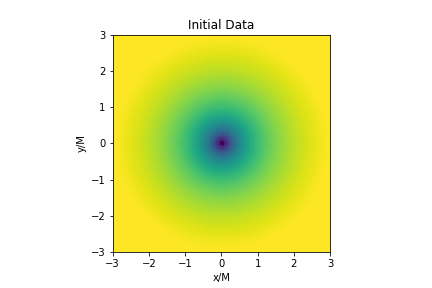

In [12]:
import numpy as np
from scipy.interpolate import griddata
from pylab import savefig
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image

x96,y96,valuesCF96,valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96 = np.loadtxt('out96.txt').T #Transposed for easier unpacking


pl_xmin = -3.
pl_xmax = +3.
pl_ymin = -3.
pl_ymax = +3.

grid_x, grid_y = np.mgrid[pl_xmin:pl_xmax:100j, pl_ymin:pl_ymax:100j]
points96 = np.zeros((len(x96), 2))
for i in range(len(x96)):
    points96[i][0] = x96[i]
    points96[i][1] = y96[i]

grid96 = griddata(points96, valuesCF96, (grid_x, grid_y), method='nearest')
grid96cub = griddata(points96, valuesCF96, (grid_x, grid_y), method='cubic')

plt.clf()
plt.title("Initial Data")
plt.xlabel("x/M")
plt.ylabel("y/M")

# fig, ax = plt.subplots()
#ax.plot(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
plt.imshow(grid96.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
savefig("ID.png")
plt.close()
Image("ID.png")
# #           interpolation='nearest', cmap=cm.gist_rainbow)

<a id='convergence'></a>

# Step 7: Validation: Convergence of numerical errors (Hamiltonian & momentum constraint violations) to zero \[Back to [top](#toc)\]
$$\label{convergence}$$

**Special thanks to George Vopal for creating the following plotting script.**

The equations behind these initial data solve Einstein's equations exactly, at a single instant in time. One reflection of this solution is that the Hamiltonian constraint violation should be exactly zero in the initial data. 

However, when evaluated on numerical grids, the Hamiltonian constraint violation will *not* generally evaluate to zero due to the associated numerical derivatives not being exact. However, these numerical derivatives (finite difference derivatives in this case) should *converge* to the exact derivatives as the density of numerical sampling points approaches infinity.

In this case, all of our finite difference derivatives agree with the exact solution, with an error term that drops with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$. 

Here, as in the [Start-to-Finish Scalar Wave (Cartesian grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWave.ipynb) and the [Start-to-Finish Scalar Wave (curvilinear grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWaveCurvilinear.ipynb) we confirm this convergence.

First, let's take a look at what the numerical error looks like on the x-y plane at a given numerical resolution, plotting $\log_{10}|H|$, where $H$ is the Hamiltonian constraint violation:

<Figure size 432x288 with 0 Axes>

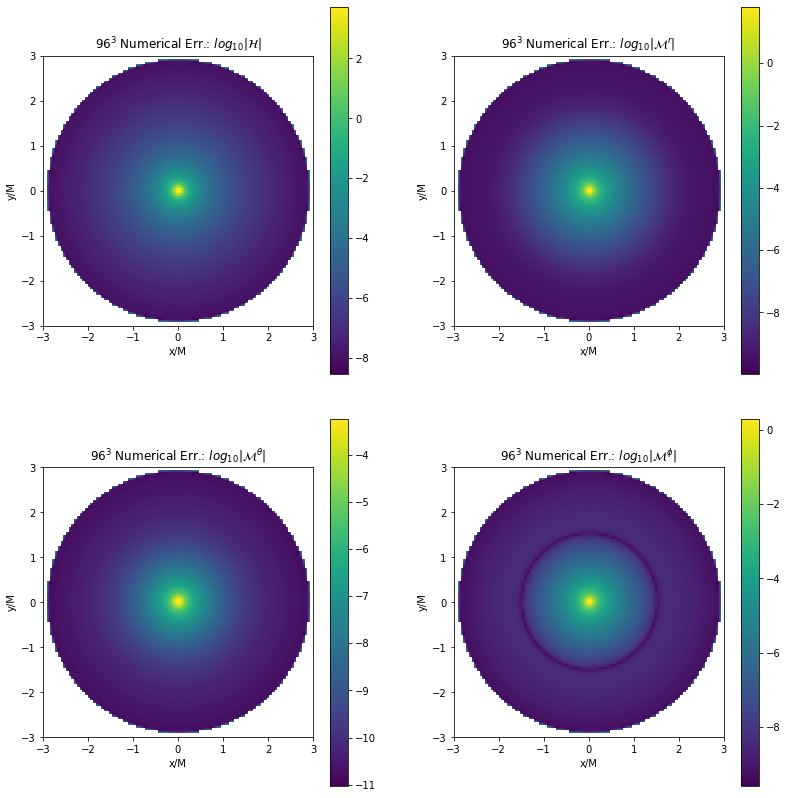

In [13]:
RefData=[valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
axN = [] #this will let us automate the subplots in the loop that follows
grid96N = [] #we need to calculate the grid96 data for each constraint for use later
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constraints (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

num_plots = 4

if dictID[initial_data_string].EnableMomentum == False:
    num_plots = 1


for p in range(num_plots):
    grid96 = griddata(points96, RefData[p], (grid_x, grid_y), method='nearest')
    grid96N.append(grid96)
    grid96cub = griddata(points96, RefData[p], (grid_x, grid_y), method='cubic')

    #fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)


    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2

    axN[p].set_xlabel('x/M')
    axN[p].set_ylabel('y/M')
    axN[p].set_title('$96^3$ Numerical Err.: $log_{10}|'+SubTitles[p]+'|$')

    fig96cub = plt.imshow(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
    cb = plt.colorbar(fig96cub)

# Adjust the spacing between plots
plt.tight_layout(pad=4)

Next, we set up the same initial data but on a lower-resolution, $48^3$ grid. Since the constraint violation (numerical error associated with the fourth-order-accurate, finite-difference derivatives) should converge to zero with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$, we expect the constraint violation will increase (relative to the $96^3$ grid) by a factor of $\left(96/48\right)^4$. Here we demonstrate that indeed this order of convergence is observed as expected. I.e., at all points *except* at the points immediately surrounding the coordinate center of the black hole (due to the spatial slice excising the physical singularity at this point through [the puncture method](http://gr.physics.ncsu.edu/UMD_June09.pdf)) exhibit numerical errors that drop as $\left(\Delta x^i\right)^4$.

<Figure size 432x288 with 0 Axes>

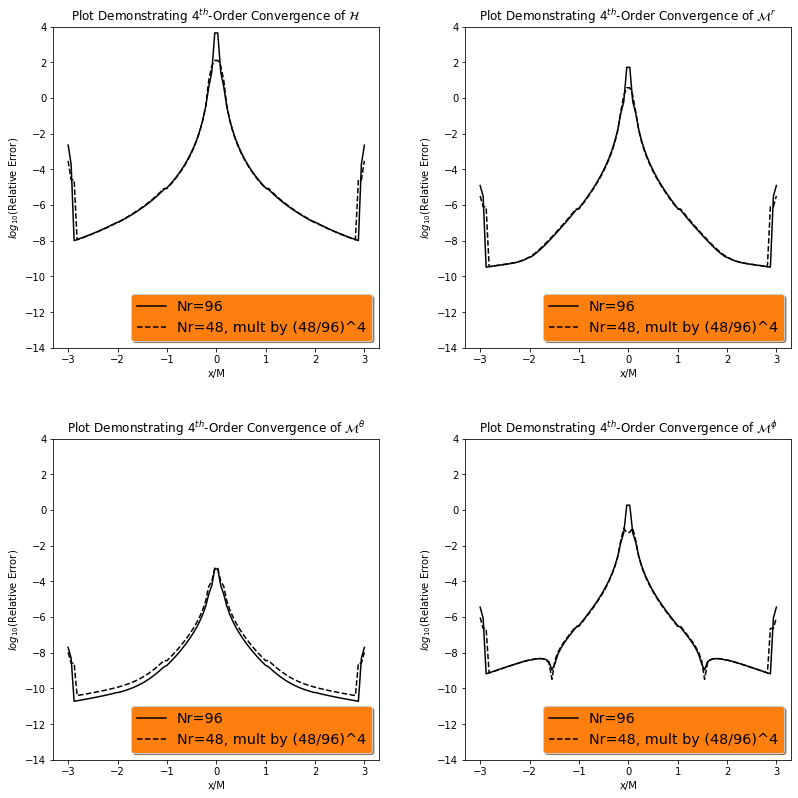

In [14]:
x48,y48,valuesCF48,valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48 = np.loadtxt('out48.txt').T #Transposed for easier unpacking
points48 = np.zeros((len(x48), 2))
for i in range(len(x48)):
    points48[i][0] = x48[i]
    points48[i][1] = y48[i]

RefData=[valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
axN = []
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constrains (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

for p in range(num_plots): #loop to cycle through our constraints and plot the data
    grid48 = griddata(points48, RefData[p], (grid_x, grid_y), method='nearest')
    griddiff_48_minus_96 = np.zeros((100,100))
    griddiff_48_minus_96_1darray = np.zeros(100*100)
    gridx_1darray_yeq0 = np.zeros(100)
    grid48_1darray_yeq0 = np.zeros(100)
    grid96_1darray_yeq0 = np.zeros(100)
    count = 0
    for i in range(100):
        for j in range(100):
            griddiff_48_minus_96[i][j] = grid48[i][j] - grid96N[p][i][j]
            griddiff_48_minus_96_1darray[count] = griddiff_48_minus_96[i][j]
            if j==49:
                gridx_1darray_yeq0[i] = grid_x[i][j]
                grid48_1darray_yeq0[i] = grid48[i][j] + np.log10((48./96.)**4)
                grid96_1darray_yeq0[i] = grid96N[p][i][j]
            count = count + 1

    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2
    axN[p].set_title('Plot Demonstrating $4^{th}$-Order Convergence of $'+SubTitles[p]+'$')
    axN[p].set_xlabel("x/M")
    axN[p].set_ylabel("$log_{10}$(Relative Error)")

    ax.plot(gridx_1darray_yeq0, grid96_1darray_yeq0, 'k-', label='Nr=96')
    ax.plot(gridx_1darray_yeq0, grid48_1darray_yeq0, 'k--', label='Nr=48, mult by (48/96)^4')
    ax.set_ylim([-14,4.])

    legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('C1')

# Adjust the spacing between plots
plt.tight_layout(pad=4)

<a id='latex_pdf_output'></a>

# Step 7: Output this notebook to $\LaTeX$-formatted PDF file \[Back to [top](#toc)\]
$$\label{latex_pdf_output}$$

The following code cell converts this Jupyter notebook into a proper, clickable $\LaTeX$-formatted PDF file. After the cell is successfully run, the generated PDF may be found in the root NRPy+ tutorial directory, with filename
[Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.pdf](Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.pdf) (Note that clicking on this link may not work; you may need to open the PDF file through another means.)

In [15]:
import cmdline_helper as cmd    # NRPy+: Multi-platform Python command-line interface
cmd.output_Jupyter_notebook_to_LaTeXed_PDF("Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data")

Created Tutorial-Start_to_Finish-BSSNCurvilinear-
    Setting_up_Exact_Initial_Data.tex, and compiled LaTeX file to PDF file
    Tutorial-Start_to_Finish-BSSNCurvilinear-
    Setting_up_Exact_Initial_Data.pdf
